# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

In [19]:
# The DST API wrapper
#%pip install git+https://github.com/alemartinello/dstapi

# A wrapper for multiple APIs with a pandas interface
#%pip install pandas-datareader

Imports and set magics:

In [24]:
import pandas as pd
import numpy as np
import ipywidgets as widgets

import datetime
import pandas_datareader 
from dstapi import DstApi

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


ModuleNotFoundError: No module named 'dstapi'

# Read and clean data

Importing the first data set about income where one of the variables is age from DST through an API (we will refer to the data set as income-age).

In [ ]:
ind = DstApi('LONS50') 

Getting a quick overview over the data

In [ ]:
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table LONS50: Earnings by age, sector, salary, salary earners, components, sex and time
Last update: 2023-11-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,ALDER1,11,TOT,"Age, total",60-,60 years and over,False
1,SEKTOR,7,1000,All sectors,1046,Corporations and organizations,False
2,AFLOEN,3,TIFA,All forms of pay,FAST,Fixed salary-earners,False
3,LONGRP,6,LTOT,Employee group total,ELE,Trainees,False
4,LØNMÅL,25,FORINKL,EARNINGS IN DKK PER HOUR WORKED,ANTAL,Number of fulltime employees in the earnings s...,False
5,KØN,3,MOK,"Men and women, total",K,Women,False
6,Tid,10,2013,2013,2022,2022,True


In [ ]:
# Then we would like to see the available values for a each variable and their id: 
for variable in tabsum['variable name']:
   print(variable+':')
   display(ind.variable_levels(variable, language='en'))


ALDER1:


,id,text
0,TOT,"Age, total"
1,-19,Under 20 years
2,20-24,20-24 years
3,25-29,25-29 years
4,30-34,30-34 years
5,35-39,35-39 years
6,40-44,40-44 years
7,45-49,45-49 years
8,50-54,50-54 years
9,55-59,55-59 years


SEKTOR:


,id,text
0,1000,All sectors
1,1032,General government
2,1016,Government including social security funds
3,1018,Municipal and regional government total
4,1020,Regional government
5,1025,Municipal government
6,1046,Corporations and organizations


AFLOEN:


,id,text
0,TIFA,All forms of pay
1,TIME,Workers paid by the hour
2,FAST,Fixed salary-earners


LONGRP:


,id,text
0,LTOT,Employee group total
1,LED,General managers
2,VOK,Employees (exclusiv young people and trainees)
3,MED,"Employees, non-managerial level"
4,UNG,"Young people, 13-17 years"
5,ELE,Trainees


LØNMÅL:


,id,text
0,FORINKL,EARNINGS IN DKK PER HOUR WORKED
1,OVERB,Overtime payment in DKK per hour worked
2,SYGDOM,"Sickness with pay, etc. in DKK per hour worked"
3,GENE,Nuisance bonus in DKK per hour worked
4,GODE,Fringe benefits in DKK per hour worked
5,UREGEL,Irregular payments in DKK per hour worked
6,PENS,Pension including ATP in DKK per hour worked
7,BASIS,Basic earnings in DKK per hour worked
8,SFERIE,..Special holiday allowance in DKK per hour wo...
9,FERIE,..Holiday payments in DKK per hour worked


KØN:


,id,text
0,MOK,"Men and women, total"
1,M,Men
2,K,Women


Tid:


,id,text
0,2013,2013
1,2014,2014
2,2015,2015
3,2016,2016
4,2017,2017
5,2018,2018
6,2019,2019
7,2020,2020
8,2021,2021
9,2022,2022


In [ ]:
# Then we use the define_base_params -method to give us a nice template (where from we can select available data).
params = ind._define_base_params(language='en')
params

{'table': 'lons50',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'ALDER1', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['*']},
  {'code': 'AFLOEN', 'values': ['*']},
  {'code': 'LONGRP', 'values': ['*']},
  {'code': 'LØNMÅL', 'values': ['*']},
  {'code': 'KØN', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [ ]:
# Here we choose the data we want as our parameters 
params = {'table': 'lons50',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'ALDER1', 'values': ['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-']},
  {'code': 'SEKTOR', 'values': ['1018', '1016', '1046']},
  {'code': 'AFLOEN', 'values': ['TIFA']},
  {'code': 'LONGRP', 'values': ['LTOT']},
  {'code': 'LØNMÅL', 'values': ['FORINKL']},
  {'code': 'KØN', 'values': ['MOK']},
  {'code': 'Tid', 'values': ['*']}]}


In [ ]:
# To get an overview of the data we print some infomation and the top of the table showing the data.
inc_api = ind.get_data(params=params)
inc_api.info()
inc_api.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ALDER1   270 non-null    object
 1   SEKTOR   270 non-null    object
 2   AFLOEN   270 non-null    object
 3   LONGRP   270 non-null    object
 4   LØNMÅL   270 non-null    object
 5   KØN      270 non-null    object
 6   TID      270 non-null    int64 
 7   INDHOLD  270 non-null    object
dtypes: int64(1), object(7)
memory usage: 17.0+ KB


,ALDER1,SEKTOR,AFLOEN,LONGRP,LØNMÅL,KØN,TID,INDHOLD
0,20-24 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,185.38
1,20-24 years,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,160.57
2,20-24 years,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,174.43
3,25-29 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,242.88
4,25-29 years,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,228.85


In [ ]:
# Next, we sort the data and again print the top of the table.
inc_api.sort_values(by=['ALDER1', 'TID', 'SEKTOR'], inplace=True)
inc_api.head(5)

,ALDER1,SEKTOR,AFLOEN,LONGRP,LØNMÅL,KØN,TID,INDHOLD
2,20-24 years,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,174.43
0,20-24 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,185.38
1,20-24 years,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,160.57
29,20-24 years,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,177.54
27,20-24 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,186.52


It seems that the "INDHOLD" column is currently stored as an object data type and the "TID" column is stored as an int64, so we will convert it to a float data type.

In [ ]:

inc_api['INDHOLD'] = inc_api['INDHOLD'].astype(float)
print(inc_api['INDHOLD'].dtype)

float64


In [ ]:
inc_api['TID'] = inc_api['TID'].astype(float)
print(inc_api['TID'].dtype)

float64


Importing the second data set about income where one of the variables is area in Denmark from DST through an API (we will refer to the data set as income-area). We will for this income-area data set go through the same methoed as we did for the income-age data set. 

In [ ]:
ind1 = DstApi('LONS30') 

Getting a quick overview over the data

In [ ]:
tabsum1 = ind1.tablesummary(language='en')
display(tabsum1)

Table LONS30: Earnings by region, sector, salary, salary earners, components, sex and time
Last update: 2023-11-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,6,000,All Denmark,081,Region Nordjylland,False
1,SEKTOR,7,1000,All sectors,1046,Corporations and organizations,False
2,AFLOEN,3,TIFA,All forms of pay,FAST,Fixed salary-earners,False
3,LONGRP,6,LTOT,Employee group total,ELE,Trainees,False
4,LØNMÅL,25,FORINKL,EARNINGS IN DKK PER HOUR WORKED,ANTAL,Number of fulltime employees in the earnings s...,False
5,KØN,3,MOK,"Men and women, total",K,Women,False
6,Tid,10,2013,2013,2022,2022,True


In [ ]:
# Then we would like to see the available values for a each variable and their id: 
for variable in tabsum1['variable name']:
  print(variable+':')
  display(ind.variable_levels(variable, language='en'))

OMRÅDE:

                Error: The table does not seem to contain the requested variable.
                Check the spelling (variable names are case sensitive
                )


IndexError('list index out of range')

SEKTOR:


,id,text
0,1000,All sectors
1,1032,General government
2,1016,Government including social security funds
3,1018,Municipal and regional government total
4,1020,Regional government
5,1025,Municipal government
6,1046,Corporations and organizations


AFLOEN:


,id,text
0,TIFA,All forms of pay
1,TIME,Workers paid by the hour
2,FAST,Fixed salary-earners


LONGRP:


,id,text
0,LTOT,Employee group total
1,LED,General managers
2,VOK,Employees (exclusiv young people and trainees)
3,MED,"Employees, non-managerial level"
4,UNG,"Young people, 13-17 years"
5,ELE,Trainees


LØNMÅL:


,id,text
0,FORINKL,EARNINGS IN DKK PER HOUR WORKED
1,OVERB,Overtime payment in DKK per hour worked
2,SYGDOM,"Sickness with pay, etc. in DKK per hour worked"
3,GENE,Nuisance bonus in DKK per hour worked
4,GODE,Fringe benefits in DKK per hour worked
5,UREGEL,Irregular payments in DKK per hour worked
6,PENS,Pension including ATP in DKK per hour worked
7,BASIS,Basic earnings in DKK per hour worked
8,SFERIE,..Special holiday allowance in DKK per hour wo...
9,FERIE,..Holiday payments in DKK per hour worked


KØN:


,id,text
0,MOK,"Men and women, total"
1,M,Men
2,K,Women


Tid:


,id,text
0,2013,2013
1,2014,2014
2,2015,2015
3,2016,2016
4,2017,2017
5,2018,2018
6,2019,2019
7,2020,2020
8,2021,2021
9,2022,2022


In [ ]:
# Then we use the define_base_params -method to give us a nice template (where from we can select available data).
params1 = ind1._define_base_params(language='en')
params1

{'table': 'lons30',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['*']},
  {'code': 'AFLOEN', 'values': ['*']},
  {'code': 'LONGRP', 'values': ['*']},
  {'code': 'LØNMÅL', 'values': ['*']},
  {'code': 'KØN', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [ ]:
# Here we choose the data we want as our parameters 
params1 = {'table': 'lons30',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['1018', '1016', '1046']},
  {'code': 'AFLOEN', 'values': ['TIFA']},
  {'code': 'LONGRP', 'values': ['LTOT']},
  {'code': 'LØNMÅL', 'values': ['FORINKL']},
  {'code': 'KØN', 'values': ['MOK']},
  {'code': 'Tid', 'values': ['*']}]}

In [ ]:
# To get an overview of the data we print some infomation and the top of the table showing the data.
inc1_api = ind1.get_data(params=params1)
inc1_api.info()
inc1_api.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   OMRÅDE   180 non-null    object
 1   SEKTOR   180 non-null    object
 2   AFLOEN   180 non-null    object
 3   LONGRP   180 non-null    object
 4   LØNMÅL   180 non-null    object
 5   KØN      180 non-null    object
 6   TID      180 non-null    int64 
 7   INDHOLD  180 non-null    object
dtypes: int64(1), object(7)
memory usage: 11.4+ KB


,OMRÅDE,SEKTOR,AFLOEN,LONGRP,LØNMÅL,KØN,TID,INDHOLD
0,Region Syddanmark,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,294.24
1,All Denmark,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2017,292.60
2,Region Sjælland,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2017,281.77
3,All Denmark,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2016,306.22
4,Region Midtjylland,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2016,288.56


In [ ]:
# Next, we sort the data and again print the top of the table.
inc1_api.sort_values(by=['OMRÅDE', 'TID', 'SEKTOR'], inplace=True)
inc1_api.head(5)

,OMRÅDE,SEKTOR,AFLOEN,LONGRP,LØNMÅL,KØN,TID,INDHOLD
8,All Denmark,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,297.40
22,All Denmark,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,309.14
46,All Denmark,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,270.49
157,All Denmark,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,300.91
158,All Denmark,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,313.27


Importing the second data set about income where one of the variables is area in Denmark from DST through an API (we will refer to the data set as income-area). We will for this income-area data set go through the same methoed as we did for the income-age data set. 

In [ ]:
inc1_api['INDHOLD'] = inc1_api['INDHOLD'].astype(float)
print(inc1_api['INDHOLD'].dtype)

float64


In [ ]:
inc1_api['TID'] = inc1_api['TID'].astype(float)
print(inc1_api['TID'].dtype)

float64


# Cleaning the data sets

In [ ]:
#Dropping irrelevant variables from first data set
Inc_age = inc_api.drop(['LONGRP', 'LØNMÅL', 'AFLOEN','KØN'],axis=1) # Drop irrelevant variables
Inc_age.head(10)

,ALDER1,SEKTOR,TID,INDHOLD
2,20-24 years,Corporations and organizations,2013.0,174.43
0,20-24 years,Government including social security funds,2013.0,185.38
1,20-24 years,Municipal and regional government total,2013.0,160.57
29,20-24 years,Corporations and organizations,2014.0,177.54
27,20-24 years,Government including social security funds,2014.0,186.52
28,20-24 years,Municipal and regional government total,2014.0,165.41
56,20-24 years,Corporations and organizations,2015.0,180.73
54,20-24 years,Government including social security funds,2015.0,189.93
55,20-24 years,Municipal and regional government total,2015.0,168.73
83,20-24 years,Corporations and organizations,2016.0,182.76


In [ ]:
#Dropping irrelevant variables from second data set
Inc_area = inc1_api.drop(['LONGRP', 'LØNMÅL', 'AFLOEN','KØN'],axis=1) # Drop irrelevant variables
Inc_area.head(10)

,OMRÅDE,SEKTOR,TID,INDHOLD
8,All Denmark,Corporations and organizations,2013.0,297.40
22,All Denmark,Government including social security funds,2013.0,309.14
46,All Denmark,Municipal and regional government total,2013.0,270.49
157,All Denmark,Corporations and organizations,2014.0,300.91
158,All Denmark,Government including social security funds,2014.0,313.27
148,All Denmark,Municipal and regional government total,2014.0,276.19
133,All Denmark,Corporations and organizations,2015.0,304.53
130,All Denmark,Government including social security funds,2015.0,315.47
154,All Denmark,Municipal and regional government total,2015.0,281.33
3,All Denmark,Corporations and organizations,2016.0,306.22


In [ ]:
# Cleaning the data by removing duplicates.
Inc_age_cleaned = Inc_age.dropna().drop_duplicates()
Inc_area_cleaned = Inc_area.dropna().drop_duplicates()

# Merge data sets

In [ ]:
# Merge datasets on common 'TID' and 'SEKTOR' assuming 'SEKTOR' exists in both.
# We are using an inner join here, meaning we only keep rows that match in both datasets.
merged_df = pd.merge(Inc_age_cleaned, Inc_area_cleaned, on=['TID', 'SEKTOR'], suffixes=('_age', '_area'))

# Check the merged data
print(merged_df.head())

        ALDER1                          SEKTOR     TID  INDHOLD_age  \
0  20-24 years  Corporations and organizations  2013.0       174.43   
1  20-24 years  Corporations and organizations  2013.0       174.43   
2  20-24 years  Corporations and organizations  2013.0       174.43   
3  20-24 years  Corporations and organizations  2013.0       174.43   
4  20-24 years  Corporations and organizations  2013.0       174.43   

               OMRÅDE  INDHOLD_area  
0         All Denmark        297.40  
1  Region Hovedstaden        333.24  
2  Region Midtjylland        279.64  
3  Region Nordjylland        263.39  
4     Region Sjælland        269.16  


# Analysis

We start our analysis with a simpel overview over the income development in the years 2013-2022. The income has been increasing every year in the period.

Text(0, 0.5, 'Average Income')

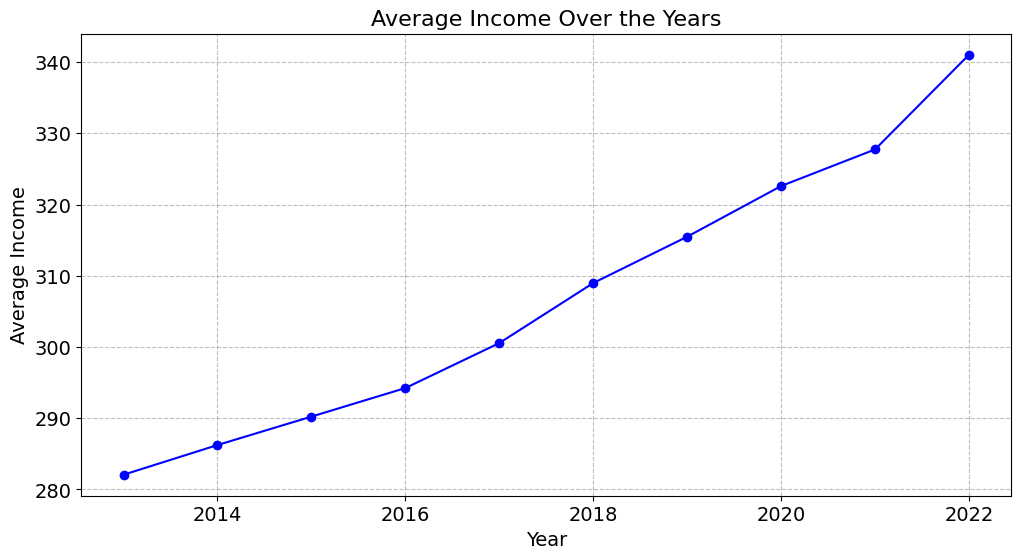

In [ ]:
# Group the data by year and calculate the average income for each year
avg_income_by_year = merged_df.groupby('TID')['INDHOLD_age'].mean()

# Plotting the average income over the years
plt.figure(figsize=(12, 6))
avg_income_by_year.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Average Income Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Income', fontsize=14)


Next, we show the development in the income for the different areas in Denmark for the same period. Here we see a much higher income in Region Hovedstaden than we see in the other areas.

In [ ]:
# Group the data by year and area, then calculate the average income for each combination
avg_income_by_year_area = merged_df.groupby(['TID', 'OMRÅDE'])['INDHOLD_area'].mean()

# Select only the top N areas with the highest average income
top_n_areas = 6
top_areas = avg_income_by_year_area.groupby(level='OMRÅDE').mean().nlargest(top_n_areas).index

# Filter the data to include only the top areas
filtered_data = avg_income_by_year_area.loc(axis=0)[:, top_areas]

# Plotting the average income over the years for each top area
plt.figure(figsize=(12, 6))
for area, data in filtered_data.groupby(level='OMRÅDE'):
    years = data.index.get_level_values('TID').astype(str).str[:4]  # Extracting the year from the index
    plt.plot(years, data.values, label=area, marker='o', linestyle='-')

plt.title('Average Income Over the Years by Top Areas', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Income', fontsize=14)
plt.legend(title='Area', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Set x-axis ticks
plt.xticks(years)

plt.show()


NameError: name 'merged_df' is not defined

In [ ]:
# Find the most recent year in the merged dataset
most_recent_year = int(merged_df['TID'].max())
print(f"Most recent year in the dataset: {most_recent_year}")


Most recent year in the dataset: 2022


In [ ]:
#pip install seaborn


In [ ]:
#For the code to the next figure we get FutureWarning which we want to ignore.
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


For the last figure, we present two boxplots where the first one shows the income distribution by age for 2022 and the second shows the income distribution by area for 2022.

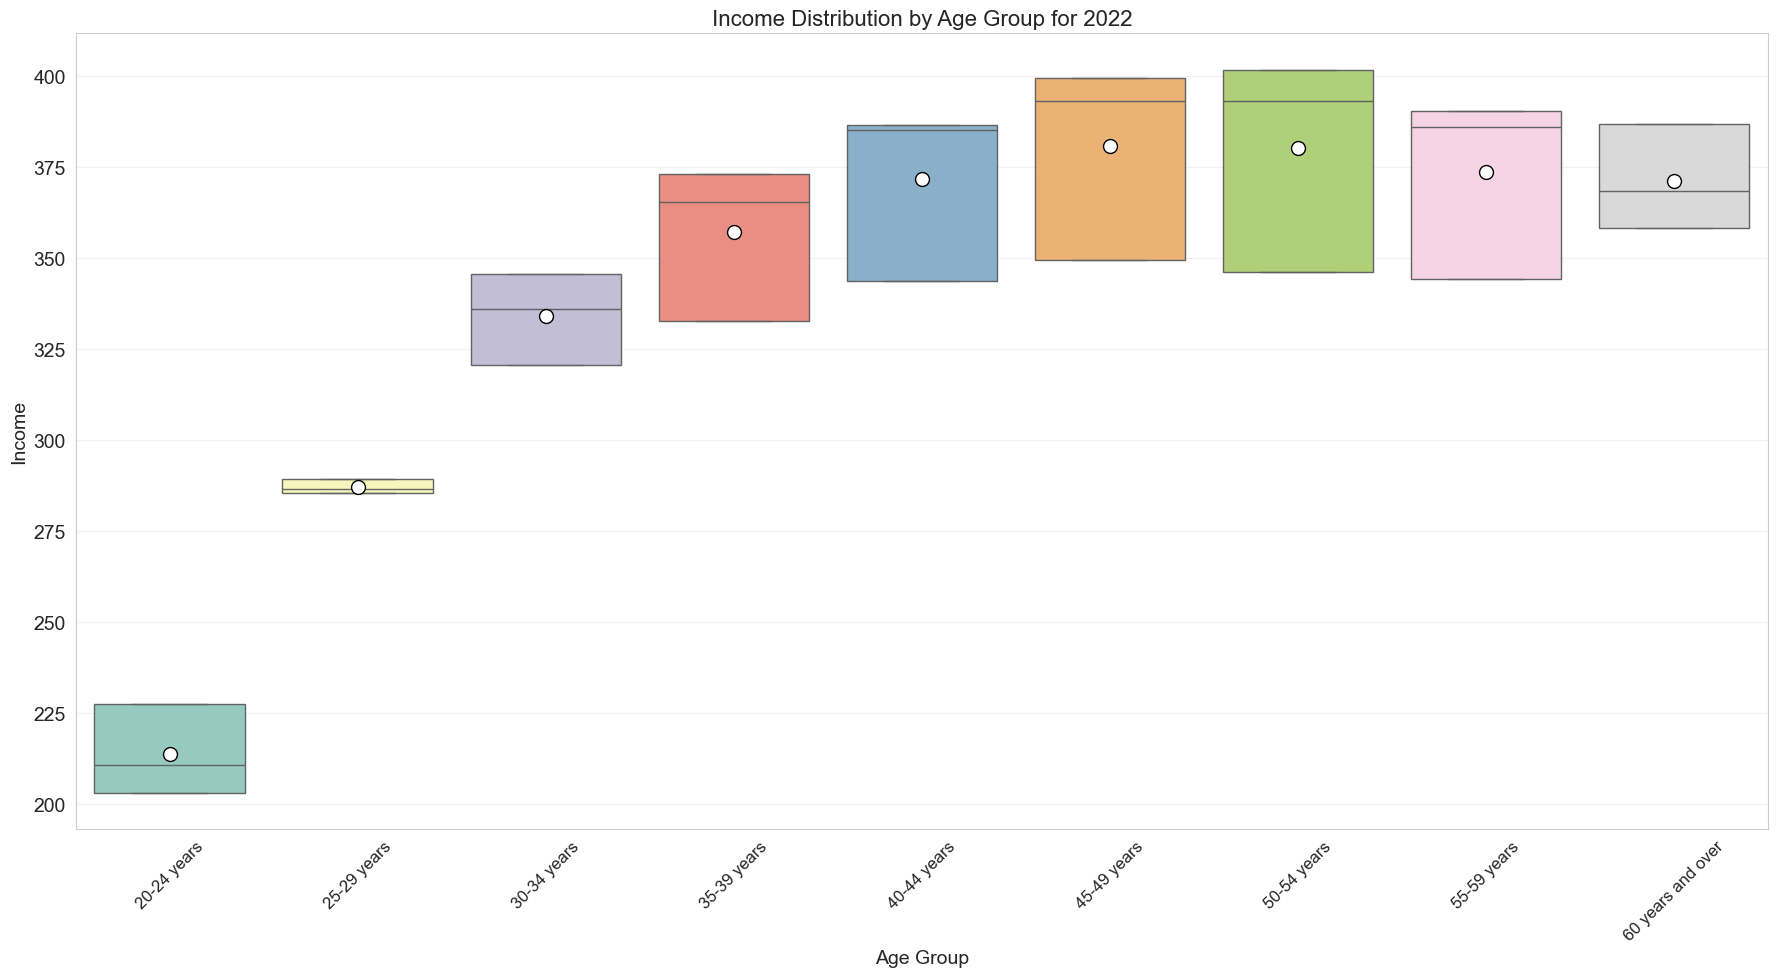

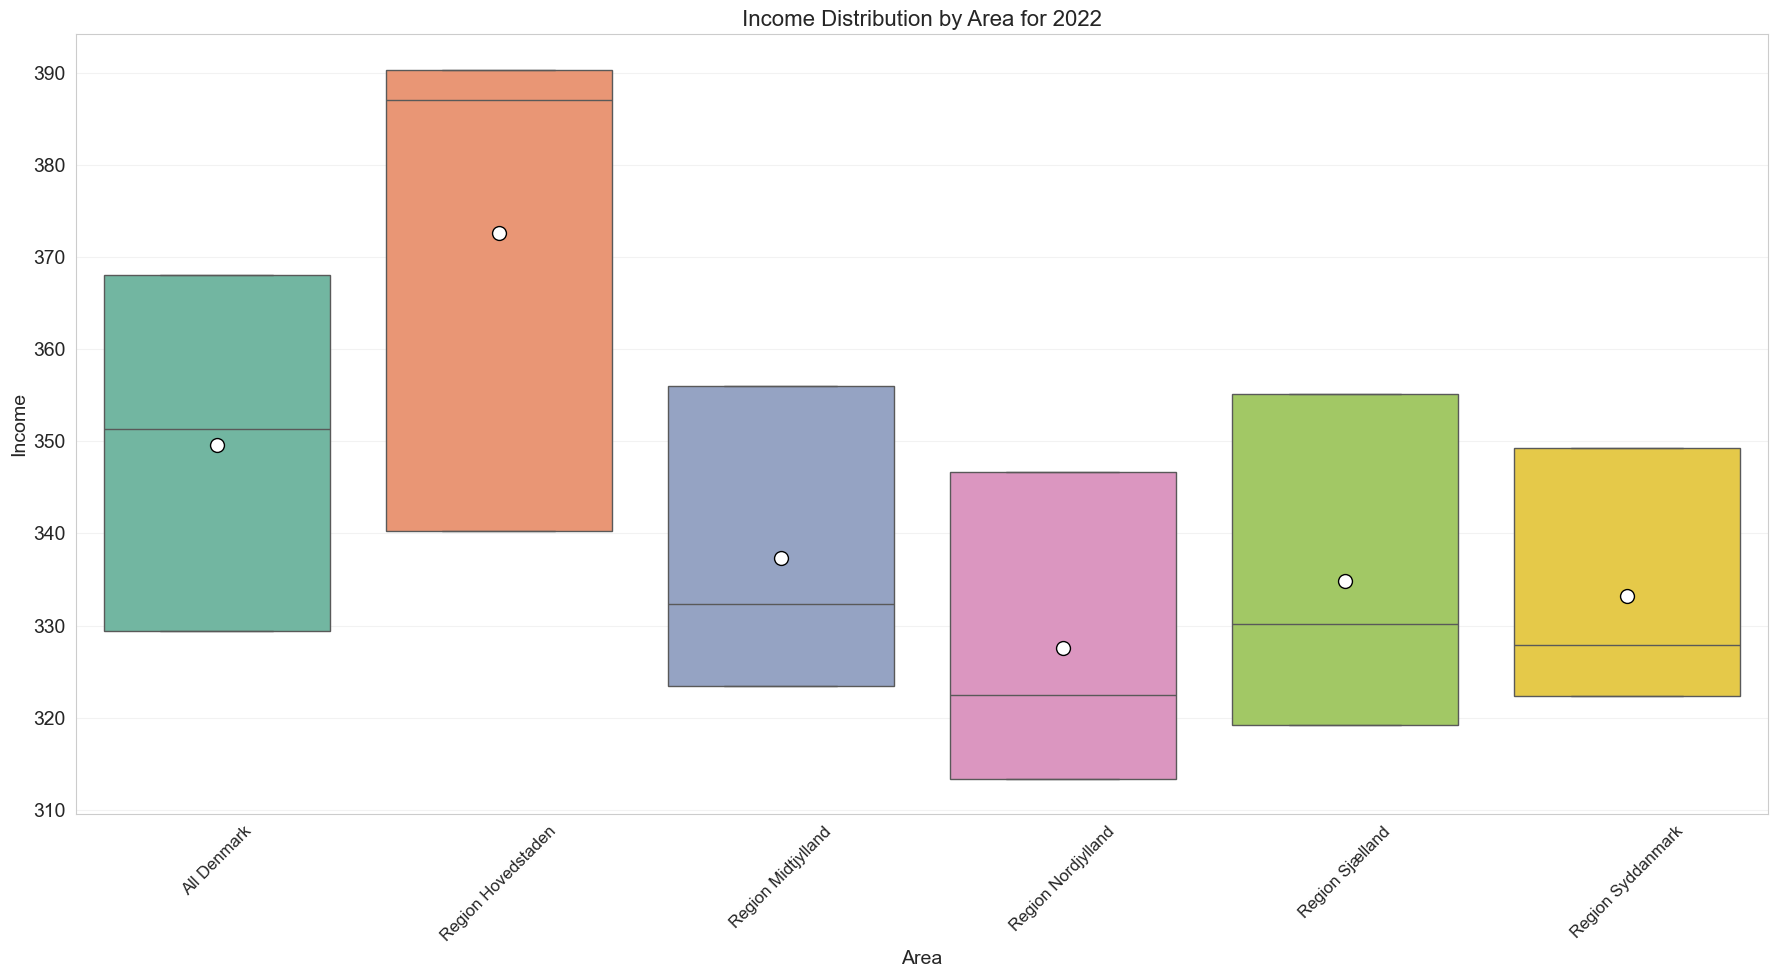

In [ ]:
# Filter merged_df for the most recent year
merged_df_recent_year = merged_df[merged_df['TID'] == most_recent_year]

# Now, proceed with your seaborn plots
import seaborn as sns

# Set the seaborn style for better aesthetics
sns.set_style("whitegrid")

# Plotting the boxplot for Age Groups
plt.figure(figsize=(18, 10))
sns.boxplot(x='ALDER1', y='INDHOLD_age', data=merged_df_recent_year, palette="Set3", showfliers=True, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
plt.title(f'Income Distribution by Age Group for {most_recent_year}', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Plotting the boxplot for Areas
plt.figure(figsize=(18, 10))
sns.boxplot(x='OMRÅDE', y='INDHOLD_area', data=merged_df_recent_year, palette="Set2", showfliers=True, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
plt.title(f'Income Distribution by Area for {most_recent_year}', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


# Conclusion

We find that income has been increasing in all regions in Denmark from 2013 to 2022. The income is greatest in the region 'Hovedstaden' and the least in 'Nordjylland' for all years, which most likely is because of 'Hovedstaden' including the capital of Denmark. Generally, we would expect to see more higher-salary jobs in capitals and larger citites. We also show two box plot with the median income for all regions and age groups in 2022. We see that although the median income for Copenhagen is very high, there is a large variability in the income distrubution for the bottom 50 pct. of income earners in 2022. 

In 2022 we see that the income median is increasing in age groups but peaks at the age group 50-54 whereafter it falls. This is presumably because young people are studying and earning a lower wage for the first years of their careers whereafter salaries increase with more experience in the job market/senior positions. The fall in income in the older age groups is most likely caused by more people retiring and switching to pensions that provides a lower income than working. For almost all age groups the median is relativly high in the box, which illustrates that there is greater income variability in the 50 pct. lowest earners compared to the 50 pct. highest.